# 결측치에 대해서 어떤식으로 접근해야 하나?
- 결측치는 누락값, 비어있는 값
- 휴먼 에러 누락값이 발생
- 누락값이 맞을 수도 있다. 
- 결측치, 누락값은 컬럼과 데이터의 관계에 대해서도 잘 이해하고 살펴야 한다.

- 누락값을, 결측치를 대처하는 우리의 자세?

- 2가지
- 1. 날려 삭제한다. 누락값 지운다. 언제? 어떤 경우? 기준이 필요하다.
- 2. 대체 대체한다.값을 채운다. 어떤 값으로? 왜? 어떻게? 기준이 필요하다.

- 이 2가지의 답은 해당 데이터 컬럼과 데이터의 관계에 따라 다를 수 있고
- 데이터 분석가의 도메인 지식이 정말 중요하다.

In [1]:
import pandas as pd
import numpy as np

In [49]:
df = pd.DataFrame({'이름':['홍길동','김영희','배철수'],
                  '성적':[50,np.nan,30],
                  '등급':['A','B',np.nan]})

In [20]:
df 

,이름,성적,등급
0,홍길동,50.0,A
1,김영희,NaN,B
2,배철수,30.0,NaN


In [22]:
#na값 결측치 missing value 어떻게 보는가?
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

1. 날리는 방법

- df.dropna(subset=['컬럼'])

In [14]:
df.dropna(subset=['성적'])

,이름,성적,등급
0,홍길동,50.0,A
2,배철수,30.0,NaN


In [15]:
df.dropna() #지금은 컬럼이 1개만 na값이라 동일한 결과지만 컬럼이 많으면 내가 날리고 싶지 않은 것도 다 날려진다.

,이름,성적,등급
0,홍길동,50.0,A


In [16]:
df.dropna(subset=['성적','등급']) #내가원하는 컬럼 지정 가능

,이름,성적,등급
0,홍길동,50.0,A


- 날리는 기준이 무엇이냐?
- 정해진 건 없다. 
- 전체 데이터가 70% 다 결측치다? 정말 데이를 써야 하나..? 
- 그보다 작은 비중의 결측치라면 최대한 대체할 수 있는 부분이면 대체하자

- 너무 적은 결측치 1%, 0.3% 5% 미만 정도면 대체하면 대체하고 분석에 큰 중요도가 없다면 날려버릴 수도 있다.

- 결측치 대체
- 값을 채운다는 뜻

In [23]:
df #성적에 대해서 na값을 대체하자!
# 성적에 있는 na값을 대체 값으로 넣어야 하고
# 그 방법이

,이름,성적,등급
0,홍길동,50.0,A
1,김영희,NaN,B
2,배철수,30.0,NaN


- fillna() na값을 채우는 방법

In [35]:
df['성적']= df['성적'].fillna(100)# 값을 넣을 수 있다.

In [43]:
df['성적']= df['성적'].fillna(df_mean)# 변수화로 넣을 수 있다.

In [47]:
df['성적']= df['성적'].fillna((50+30)/2)# 식으로?

In [50]:
df

,이름,성적,등급
0,홍길동,50.0,A
1,김영희,NaN,B
2,배철수,30.0,NaN


In [41]:
df_mean=df.성적.mean()

In [42]:
df_mean

40.0

- na값에 대한 통계치 계산
- 통계치를 구할 때 na값은 반영이 안 된다.
- 값의 개수를 셀 때 na값은 반영이 안 된다.

In [66]:
np.mean(df['age']) #넘파이를 감싸주는 것 

29.69911764705882

In [67]:
df.age.mean() #반영 안 된 2개의 평균

29.69911764705882

In [54]:
df.등급.value_counts() # 반영 제외 

A    1
B    1
Name: 등급, dtype: int64

## 타이타닉 데이터 정제하기!

In [56]:
import seaborn as sns

In [59]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [61]:
df.shape

(891, 15)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [69]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [70]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

- 수치형 데이터와
- 문자형 데이터에 결측치를 대체하는 방법은 다 다르다!

- 문자형 데이터는 예시로 보면 가장 많이 나오는 값으로 대체할 수 있고, 분석가의 도메인에 따라 다르게 대체할 수도 있다.
- 수치형 데이터는 평균, 전 값과 비교해서 넣을 수도 있고, 두 값 사이에 대한 평균으로 넣을 수 있고 
- 보간법의 개념 

## 결측치들이 존재한다면?
- 우선적으로 시각화를 통해서 분포를 확인해야 한다.

In [72]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### - 결측치를 채울 때는 결국엔 이 모든 과정들이 머신에게 학습하기 위한 과정이고
### - 머신에게 학습하기 위해서는 결국 그 피처에 대한 특성을 정확히 설명해 주는 것이 중요함
### - 그렇다면 그 피처는 결국 y값 라벨에 대한 값과 어떤 관계가 있는지가 결국 대체할 때 중요한 포인트가 된다.
### - 이런 것들을 시각화해 보면서 인사이트를 도출하고 다양한 분석가들과 이야기를 나눈다. ( 조별끼리 )

- sns를 이용해서 시각화 하기

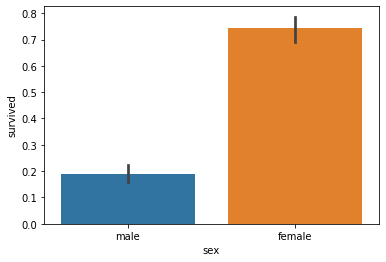

In [73]:
sns.barplot(x='sex', y='survived', data= df)

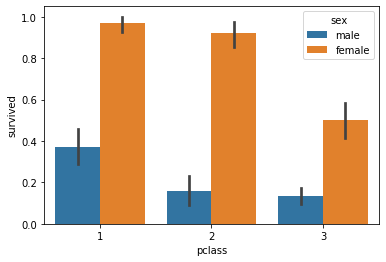

In [74]:
sns.barplot(x='pclass', y='survived', hue='sex',data= df)

- 어떤 피처가 어떤 특성으로 y값과 패턴을 보이느냐 이런 것들이 결국 결축치를 대체할 때 중요한 방법 중하나, 인사이트를 얻는 방법

In [76]:
df['age'].max()

80.0

In [78]:
df['age'].min()

0.42

- 과적합 포인트가 될 수 있고
- 연령은 사실 10 20 30 40 층을 나눠서 비교해도 충분히 이해가 될 수 있다.

- 수치형 데이터는 범주화 시켜서 하나의 범주형 카테고리로 연령을 만들어 된다.
- 0~5 아이 6~10 유치원생.... 20 성인  50 노인

In [80]:
import matplotlib.pyplot as plt

In [81]:
##
group=['baby','child','student','Young adult','Adult','Elderly']

In [82]:
group

['baby', 'child', 'student', 'Young adult', 'Adult', 'Elderly']

In [84]:
def cat_age(age):
    cat = ''
    if age <=5 :cat ='baby'
    elif age <=18: cat='child'
    elif age <=30: cat='student'
    elif age <=40: cat='Young adult'
    elif age <=60: cat='Adult'
    else: cat ='Elderly'
    
    return cat

In [87]:
plt.figure(figsize=(15,10))
df['cat_age'] = df['age'].apply(lambda x:cat_age(x))

<Figure size 1080x720 with 0 Axes>

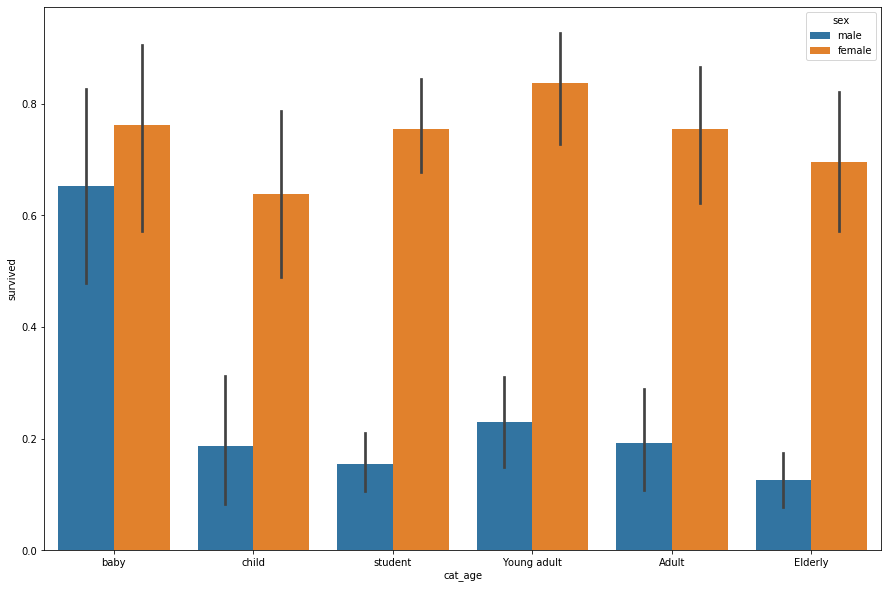

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(x='cat_age',y='survived',hue='sex', data = df, order = group)

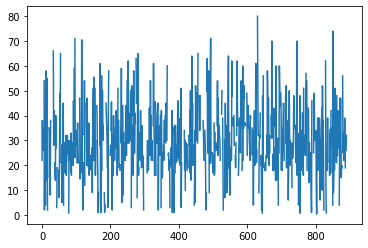

In [90]:
df.age.plot()

In [92]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cat_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,student
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Young adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,student
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,student
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,student
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Elderly
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,student


- 머신러닝은 수치형 변수만 학습할 수 있다.
- 즉 숫자데이터만 학습가능하다.
- 문자열, object는 학습 이 불가핟.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  cat_age      891 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(6)
memory usage: 87.6+ KB


## 문자열 데이터를 -> 수치형 데이터로 바꿔야 한다!
- 인코딩
- 인코딩 , 원핫인코딩, 레이블인코딩
- 인코딩은 원핫으로 진행하게 된다.
- 원핫인코딩은 0과 1로 표현을 하는 것
- 레이블인코딩은 숫자데이터를 순서척도로 바꿔서 1,2,3,4,5,6... 숫자로  만드는 것

In [94]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

## 원핫 인코딩
- 판다스에 제공해주는 함수 get_dummies 를 사용 쉽게 원핫인코딩 0과 1로 바꾼다.

In [100]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cat_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,student
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Young adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,student
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,student
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,student
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Elderly
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,student


In [101]:
pd.get_dummies(df['sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


### 필수과제1
- 우수학회원 선발에서 제외될 수 있음
- 조별로 진행하시는 분들 해당 팀끼리 협업하여 결과물 1개로 제출하셔 된다.
- 개인의 경우는 개인으로 제출해야 된다.

- 타이타닉데이터로 수업시간에 머신러닝을 진행할건데 여러분들이 전처리한 데이터를 가지고 진행할 것
- 여러분들이 전처리한 데이터에대한 정확도나 다른 지표들을 확인할 수 있다.
- 전처리는 모두 동일하게 하지 않을 것이기 때문에 실제 다른 분들의 전처리를 보고 그걸 통해 나온 정확도 등을 확인해서
- 어떤지 알아보는 시간

- 타이타닉 데이터를 전처리 꼭 진행 주시고 하나의 데이터프레임으로 만들어 주시는데
- 문자열 데이터가 다 인코딩이 되고, 수치형 데이터도 결측치가 없는 하나의 깔끔한 데이터 프레임으로 만들어 제출해 주셔야 합니다.
- 파일 형식은 csv 파일입니다.
- 가장 우선적으로는 조별로 진행해 주시는 분들 데이터를 가지고 수업시간 확인할 것
- 부족하다면 개인의 과제를 랜덤하게 추출할 예정

- csv파일만 제출하는 게 아니라 구체적인 코드와 주석과 왜 그렇게 하셨는지? 왜 전처리를 그렇게 했는지 정확하게 설명해 주셔야 합니다.